In [1]:
import os
import git
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

ROOT_DIR =  Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
SAVE_FIGS = True
DPI = 100

In [ ]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from reporting import *
# plots_path = os.path.join(ROOT_DIR, "publication", "paper", "draft_plots")
plots_path = os.path.join(ROOT_DIR, "publication", "paper", "final_plots", "results")
main_df = main_df.copy()
np.random.seed(0)
name_mapping = {'syntheticMRI3Dfull': 'syntheticMRI3D',
                'syntheticMRI2Daxial': 'syntheticMRI2D (axial)',
                'syntheticMRI2Dsagittal': 'syntheticMRI2D (sagittal)',
                'syntheticMRI2Dcoronal': 'syntheticMRI2D (coronal)',
                'spaceNetfull': 'spaceNet',
                'cocoindoor': 'coco (indoor)',
                'cocooutdoor': 'coco (outdoor)',
                'pastisfull': 'pastis',
                'segmentAnythingfull': 'segmentAnything',
                'agriVisionfull': 'agriVision',
                'standardTestingfull': 'standardTesting'}

main_df['dataset'] = (main_df['dataset'] + main_df['subset']).replace(name_mapping)
main_df['dataset'].value_counts()

dataset
agriVision                   176
segmentAnything              172
coco (outdoor)               160
coco (indoor)                158
spaceNet                     152
pastis                       135
syntheticMRI3D                42
syntheticMRI2D (axial)        21
syntheticMRI2D (coronal)      21
syntheticMRI2D (sagittal)     21
Name: count, dtype: int64

# KS Stat (r, eta) & (r, 1/beta) Point Plots

In [3]:
fontsize = 20
markersize = 10
labelsize = 15
markertypes = ['x', 'D', 'o', '+']
labels = ['GenGamma', 'Laplace', 'Gaussian', 'Student-t', r'$\alpha\geq0.05$', r'$\alpha\geq0.10$']
points = [Line2D([0], [0], color='k', linestyle='', marker=m, markersize=10) for m in markertypes] + [
    Rectangle((0, 0), 1, 1, color='black', alpha=0.1),
    Rectangle((0, 0), 1, 1, color='black', alpha=0.3),
]

color_palette = {
    'gray': 'xkcd:gray',
    'green': 'xkcd:shamrock green',
    'red': 'xkcd:light red',
    'blue': 'xkcd:blue',
}

fit_cat_palette = {
    'actually_pass': 'green',
    'practically_pass': 'orange',
    'borderline': 'xkcd:golden yellow',
    'interesting_failure': 'xkcd:light red',
    'trivial_failure': 'red'
}

transform_palette = {
    'wavelet': 'xkcd:light purple',
    'fourier': 'xkcd:red',
    'learned': 'xkcd:marine blue'
}

temp = main_df.copy()

fontsize=25
r_valid = (temp['best_r'].min() - 0.005, temp['best_r'].max())
eta_valid = (-1.5, 20)
xlims = (r_valid[0] - 0.1, r_valid[1] + 0.1)
eta_lims = (-3, 21)
ylims = (eta_valid[0] - 0.1, eta_valid[1] + 0.1)

r_roi = (temp['best_r'].min() - 0.5, temp['best_r'].max())
eta_roi = (-0.1, 0.1)
log_scale = True

r_vals = np.linspace(r_valid[0], r_valid[1], 1001)
beta_vals_above = (1.5 + eta_valid[1]) / r_vals
beta_vals_below = (1.5 + (-1.4)) / r_vals

r_vals_roi = np.linspace(r_roi[0], r_roi[1], 1001)
r_vals_roi = np.where(r_vals_roi == 0, 1e-10, r_vals_roi)  # Replace zero with a small positive value
beta_vals_roi_above = (3 / (2 * r_vals_roi) / 0.1)
beta_vals_roi_below = (3 / (2 * r_vals_roi) * (-0.1))

r_shade_roi = np.linspace(*r_roi, 100)
eta_shade_roi = np.linspace(*eta_roi, 100)

# Define Region of Interest borders in r-eta space
x_border = [r_shade_roi[0], r_shade_roi[-1], r_shade_roi[-1], r_shade_roi[0], r_shade_roi[0]]
y_border = [eta_shade_roi[0], eta_shade_roi[0], eta_shade_roi[-1], eta_shade_roi[-1], eta_shade_roi[0]]

# Calculate Region of Interest borders in r-(1/beta) space
beta_border = (np.array(y_border) + 1.5) / np.array(x_border)
x_border_beta = x_border
y_border_beta = beta_border

## Overall

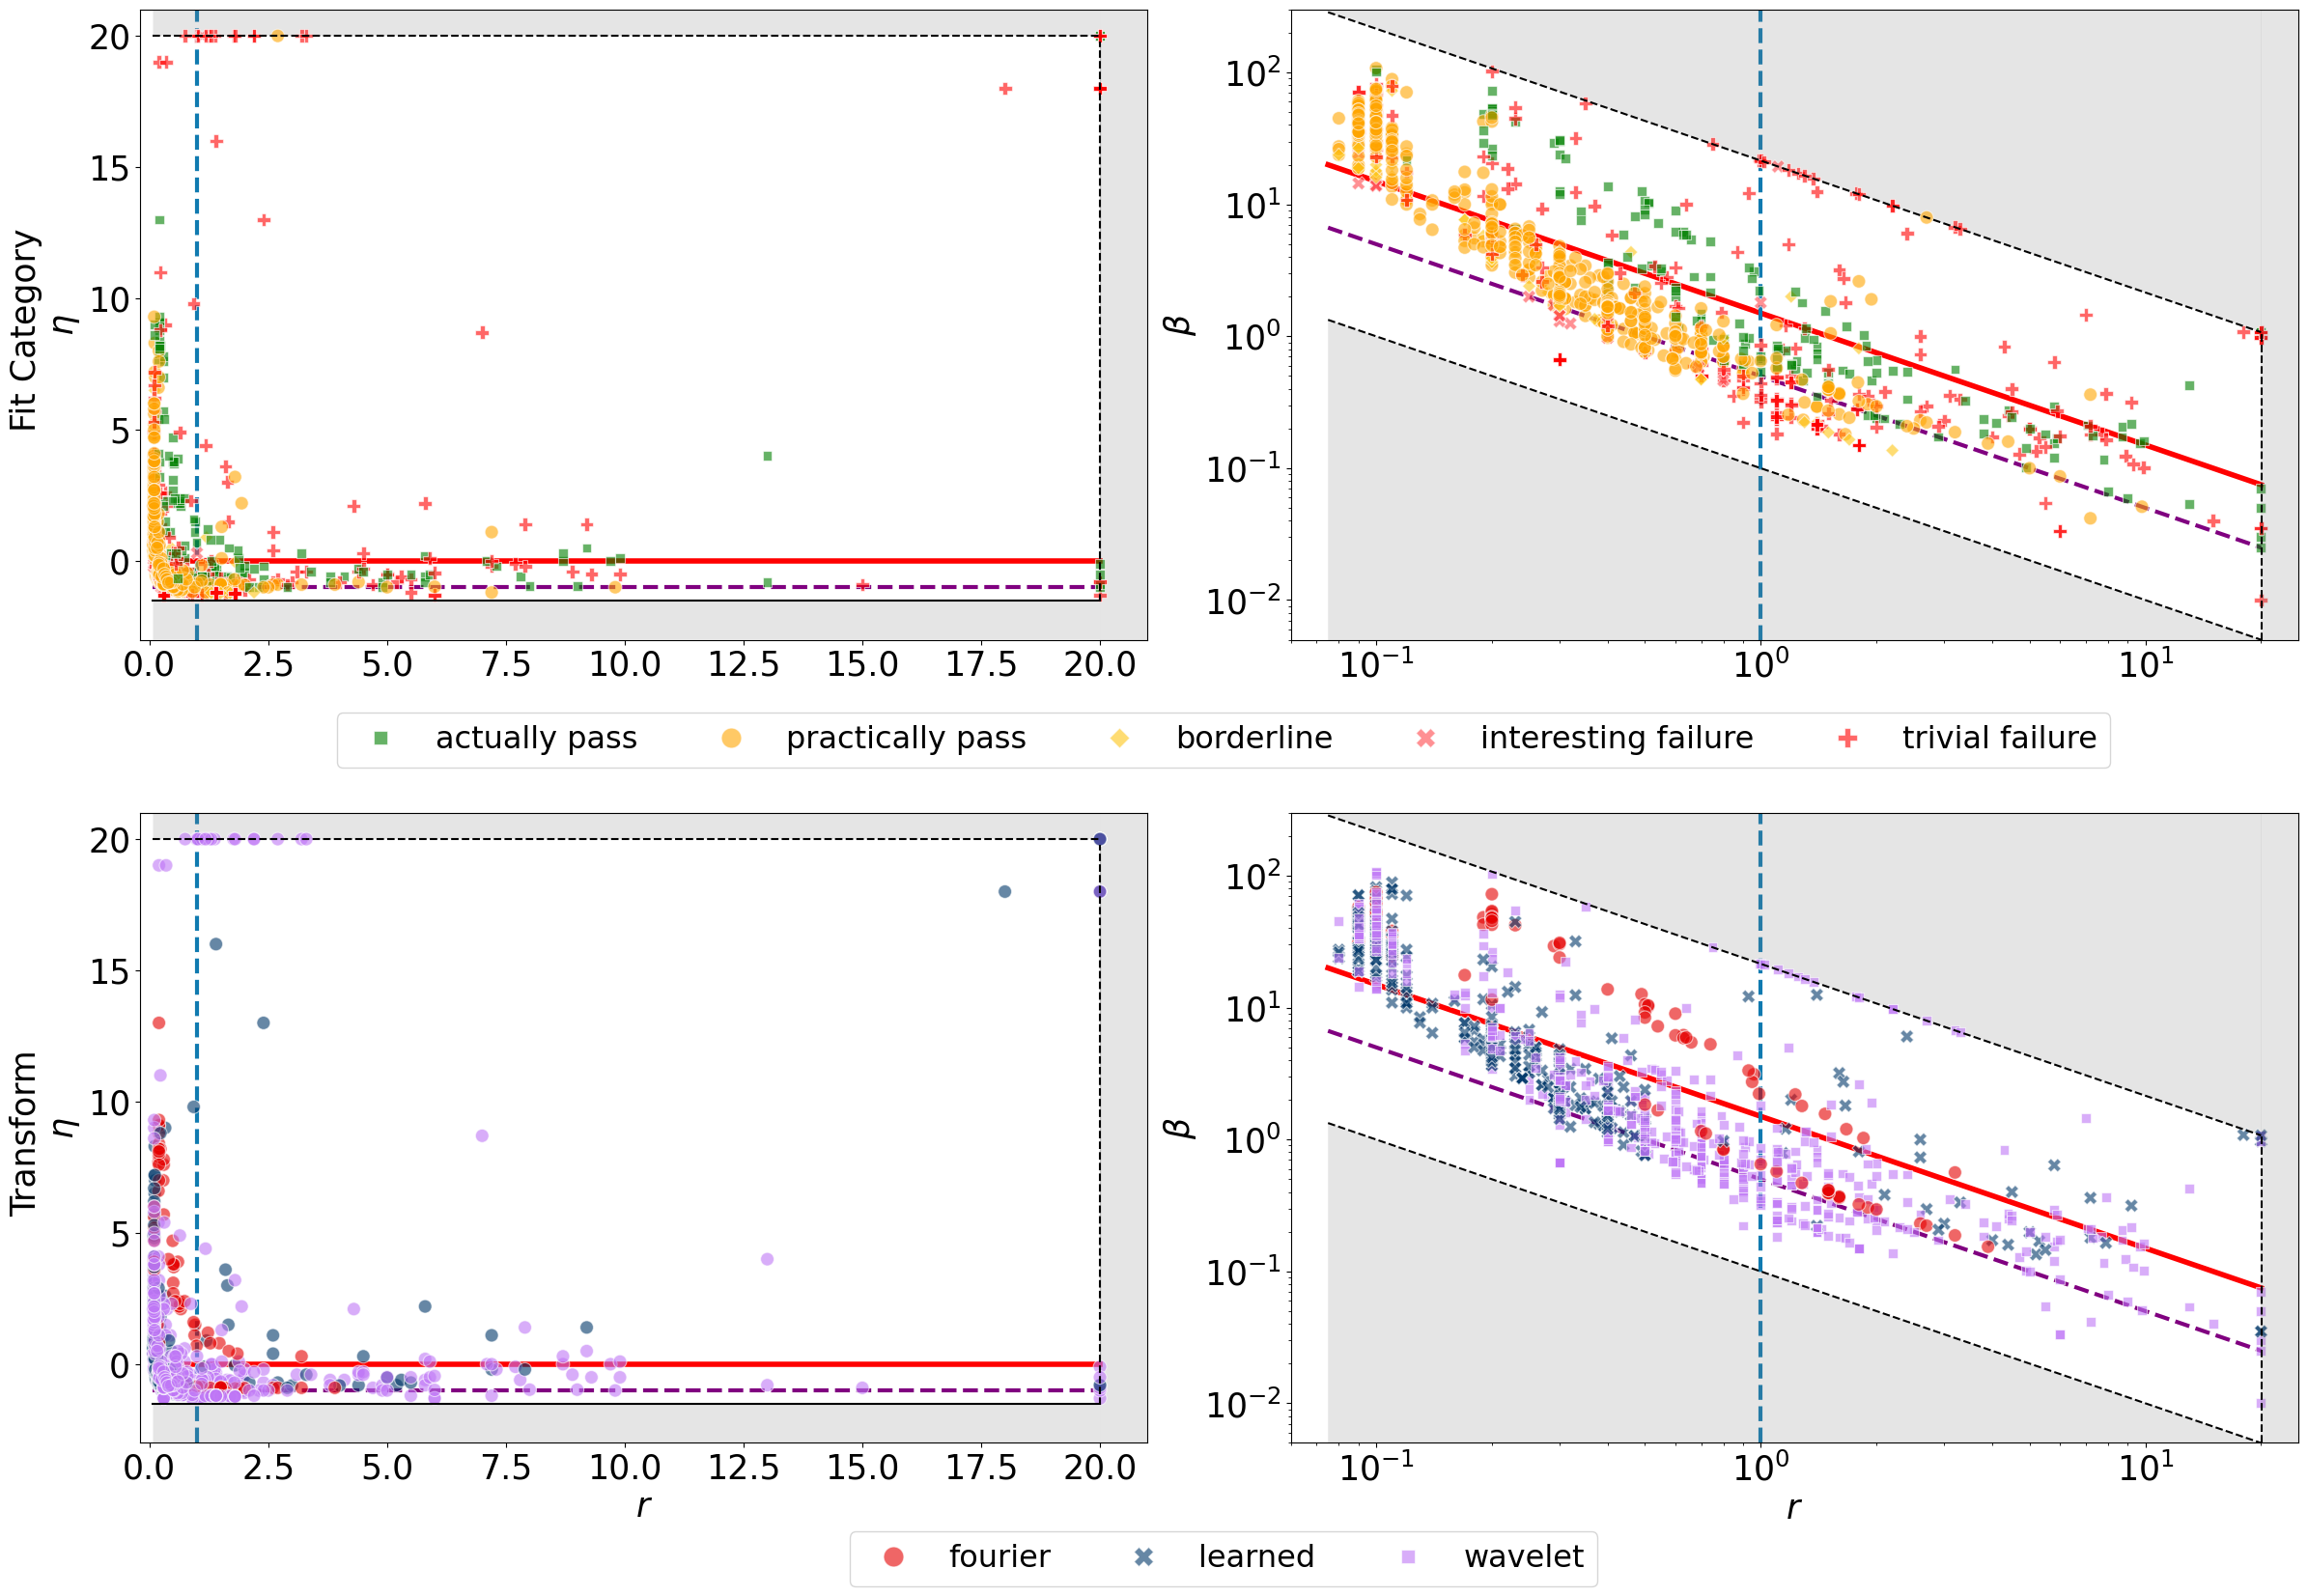

In [4]:
category_1 = 'failure_category'
category_2 = 'transform'

fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# First row, first plot: r-eta space with failure categories
axes[0, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[0, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[0, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[0, 0], linestyle='--')
axes[0, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[0, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[0, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[0, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[0, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_1, ax=axes[0, 0], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)

axes[0, 0].set_xlabel(" ", fontsize=fontsize)
axes[0, 0].set_ylabel("Fit Category \n" + r"$\eta$", fontsize=fontsize)
axes[0, 0].set_ylim(eta_lims)
axes[0, 0].set_xlim((-0.2, 21))
axes[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[0, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# First row, second plot: r-(1/beta) space with failure categories
axes[0, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[0, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[0, 1], linestyle="--")
axes[0, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[0, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[0, 1], linestyle='--', linewidth=3, zorder=0)
axes[0, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_1, ax=axes[0, 1], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[0, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[0, 1].set_xlabel(" \n \n ", fontsize=fontsize)
axes[0, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[0, 1].set_xlim((0.06, 25))
axes[0, 1].set_ylim((0.005, 300))
axes[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

handles_fit, labels_fit = axes[0, 0].get_legend_handles_labels()
labels_fit = [l.replace("_", " ") for l in labels_fit]

desired_order_fit = ['actually pass', 'practically pass', 'borderline', 'interesting failure', 'trivial failure']
label_handle_map_fit = dict(zip(labels_fit, handles_fit))

labels_fit = [label for label in desired_order_fit if label in label_handle_map_fit]
handles_fit = [label_handle_map_fit[label] for label in labels_fit]

fig.legend(
    handles_fit, 
    labels_fit, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, 0.49), 
    ncol=5
)

axes[0, 1].legend().set_visible(False)
axes[0, 0].legend().set_visible(False)

# Second row, first plot: r-eta space with dataset_types

axes[1, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[1, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[1, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[1, 0], linestyle='--')
axes[1, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[1, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[1, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[1, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[1, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_2, ax=axes[1, 0], alpha=0.6, s=100, palette=transform_palette)

axes[1, 0].set_xlabel(r"$r$", fontsize=25)
axes[1, 0].set_ylabel(f"{category_2.capitalize()} \n" + r"$\eta$", fontsize=fontsize)
axes[1, 0].set_ylim(eta_lims)
axes[1, 0].set_xlim((-0.2, 21))
axes[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[1, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# Second row, second plot: r-(1/beta) space with failure categories
axes[1, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[1, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[1, 1], linestyle="--")
axes[1, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[1, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[1, 1], linestyle='--', linewidth=3, zorder=0)
axes[1, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_2, ax=axes[1, 1], alpha=0.6, s=100, style=category_2, palette=transform_palette)
axes[1, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[1, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[1, 1].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[1, 1].set_xlim((0.06, 25))
axes[1, 1].set_ylim((0.005, 300))
axes[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_yscale('log')
# Create a shared legend for both plots on the second row
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, -0.04), 
    ncol=5
)
axes[1, 1].legend().set_visible(False)
axes[1, 0].legend().set_visible(False)

plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"fit_category_{category_2}_point_plot.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')


## Remote Sensing

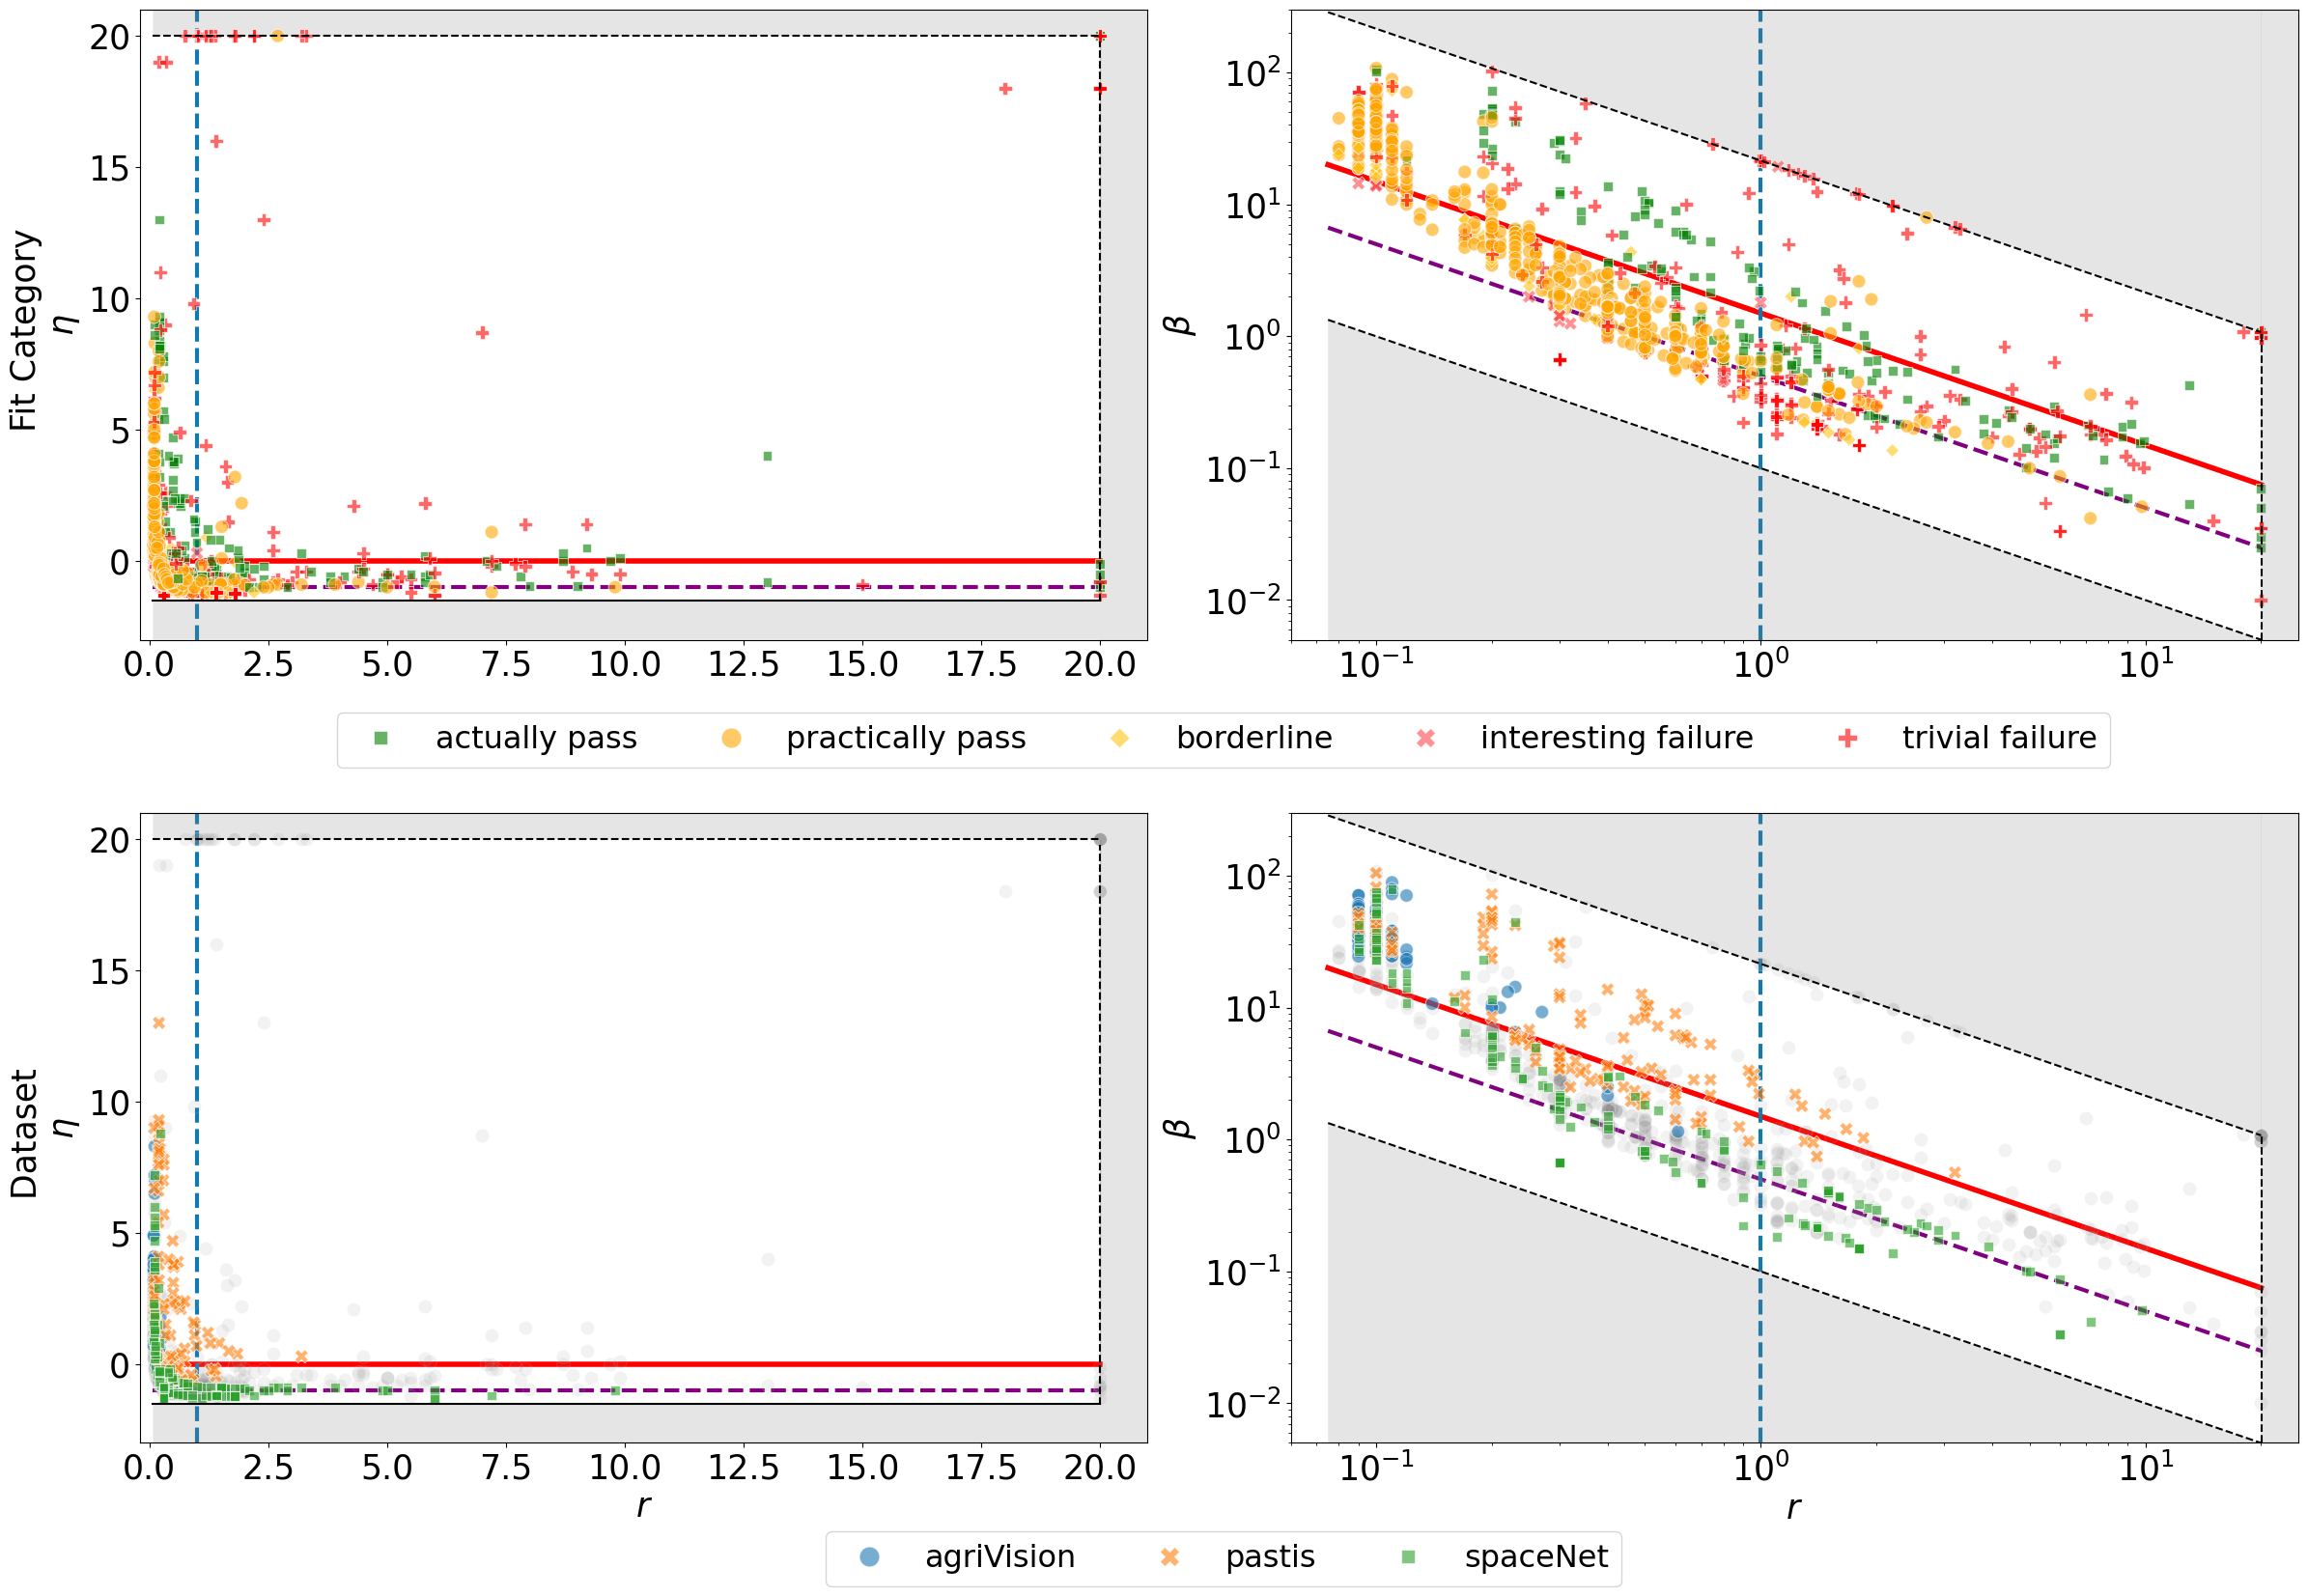

In [5]:
temp = main_df.copy()
category_1 = 'failure_category'
category_2 = 'dataset'
dataset_type = 'remote sensing'

temp['dataset'] = temp['dataset'].apply(lambda x : x if x in list(temp[temp['dataset_type'] == dataset_type]['dataset'].unique()) else 'other')

fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# First row, first plot: r-eta space with failure categories
axes[0, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[0, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[0, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[0, 0], linestyle='--')
axes[0, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[0, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[0, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[0, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[0, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_1, ax=axes[0, 0], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)

axes[0, 0].set_xlabel(" ", fontsize=fontsize)
axes[0, 0].set_ylabel("Fit Category \n" + r"$\eta$", fontsize=fontsize)
axes[0, 0].set_ylim(eta_lims)
axes[0, 0].set_xlim((-0.2, 21))
axes[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[0, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# First row, second plot: r-(1/beta) space with failure categories
axes[0, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[0, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[0, 1], linestyle="--")
axes[0, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[0, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[0, 1], linestyle='--', linewidth=3, zorder=0)
axes[0, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_1, ax=axes[0, 1], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[0, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[0, 1].set_xlabel(" \n \n ", fontsize=fontsize)
axes[0, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[0, 1].set_xlim((0.06, 25))
axes[0, 1].set_ylim((0.005, 300))
axes[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

handles_fit, labels_fit = axes[0, 0].get_legend_handles_labels()
labels_fit = [l.replace("_", " ") for l in labels_fit]

desired_order_fit = ['actually pass', 'practically pass', 'borderline', 'interesting failure', 'trivial failure']
label_handle_map_fit = dict(zip(labels_fit, handles_fit))

labels_fit = [label for label in desired_order_fit if label in label_handle_map_fit]
handles_fit = [label_handle_map_fit[label] for label in labels_fit]

fig.legend(
    handles_fit, 
    labels_fit, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, 0.49), 
    ncol=5
)

axes[0, 1].legend().set_visible(False)
axes[0, 0].legend().set_visible(False)

# Second row, first plot: r-eta space with dataset_types

axes[1, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[1, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[1, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[1, 0], linestyle='--')
axes[1, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[1, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[1, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[1, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[1, 0], linestyle="--")
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_eta', ax=axes[1, 0], alpha=0.1, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_eta', hue=category_2, ax=axes[1, 0], alpha=0.6, s=100, style=category_2)

axes[1, 0].set_xlabel(r"$r$", fontsize=25)
axes[1, 0].set_ylabel(f"{category_2.capitalize()} \n" + r"$\eta$", fontsize=fontsize)
axes[1, 0].set_ylim(eta_lims)
axes[1, 0].set_xlim((-0.2, 21))
axes[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[1, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# Second row, second plot: r-(1/beta) space with failure categories
axes[1, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[1, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[1, 1], linestyle="--")
axes[1, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[1, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[1, 1], linestyle='--', linewidth=3, zorder=0)
axes[1, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_beta', ax=axes[1, 1], alpha=0.1, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_beta', hue=category_2, ax=axes[1, 1], alpha=0.6, s=100, style=category_2)

axes[1, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[1, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[1, 1].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[1, 1].set_xlim((0.06, 25))
axes[1, 1].set_ylim((0.005, 300))
axes[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_yscale('log')
# Create a shared legend for both plots on the second row
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, -0.04), 
    ncol=5
)
axes[1, 1].legend().set_visible(False)
axes[1, 0].legend().set_visible(False)

plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"fit_category_{dataset_type}_point_plot.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')



## Natural

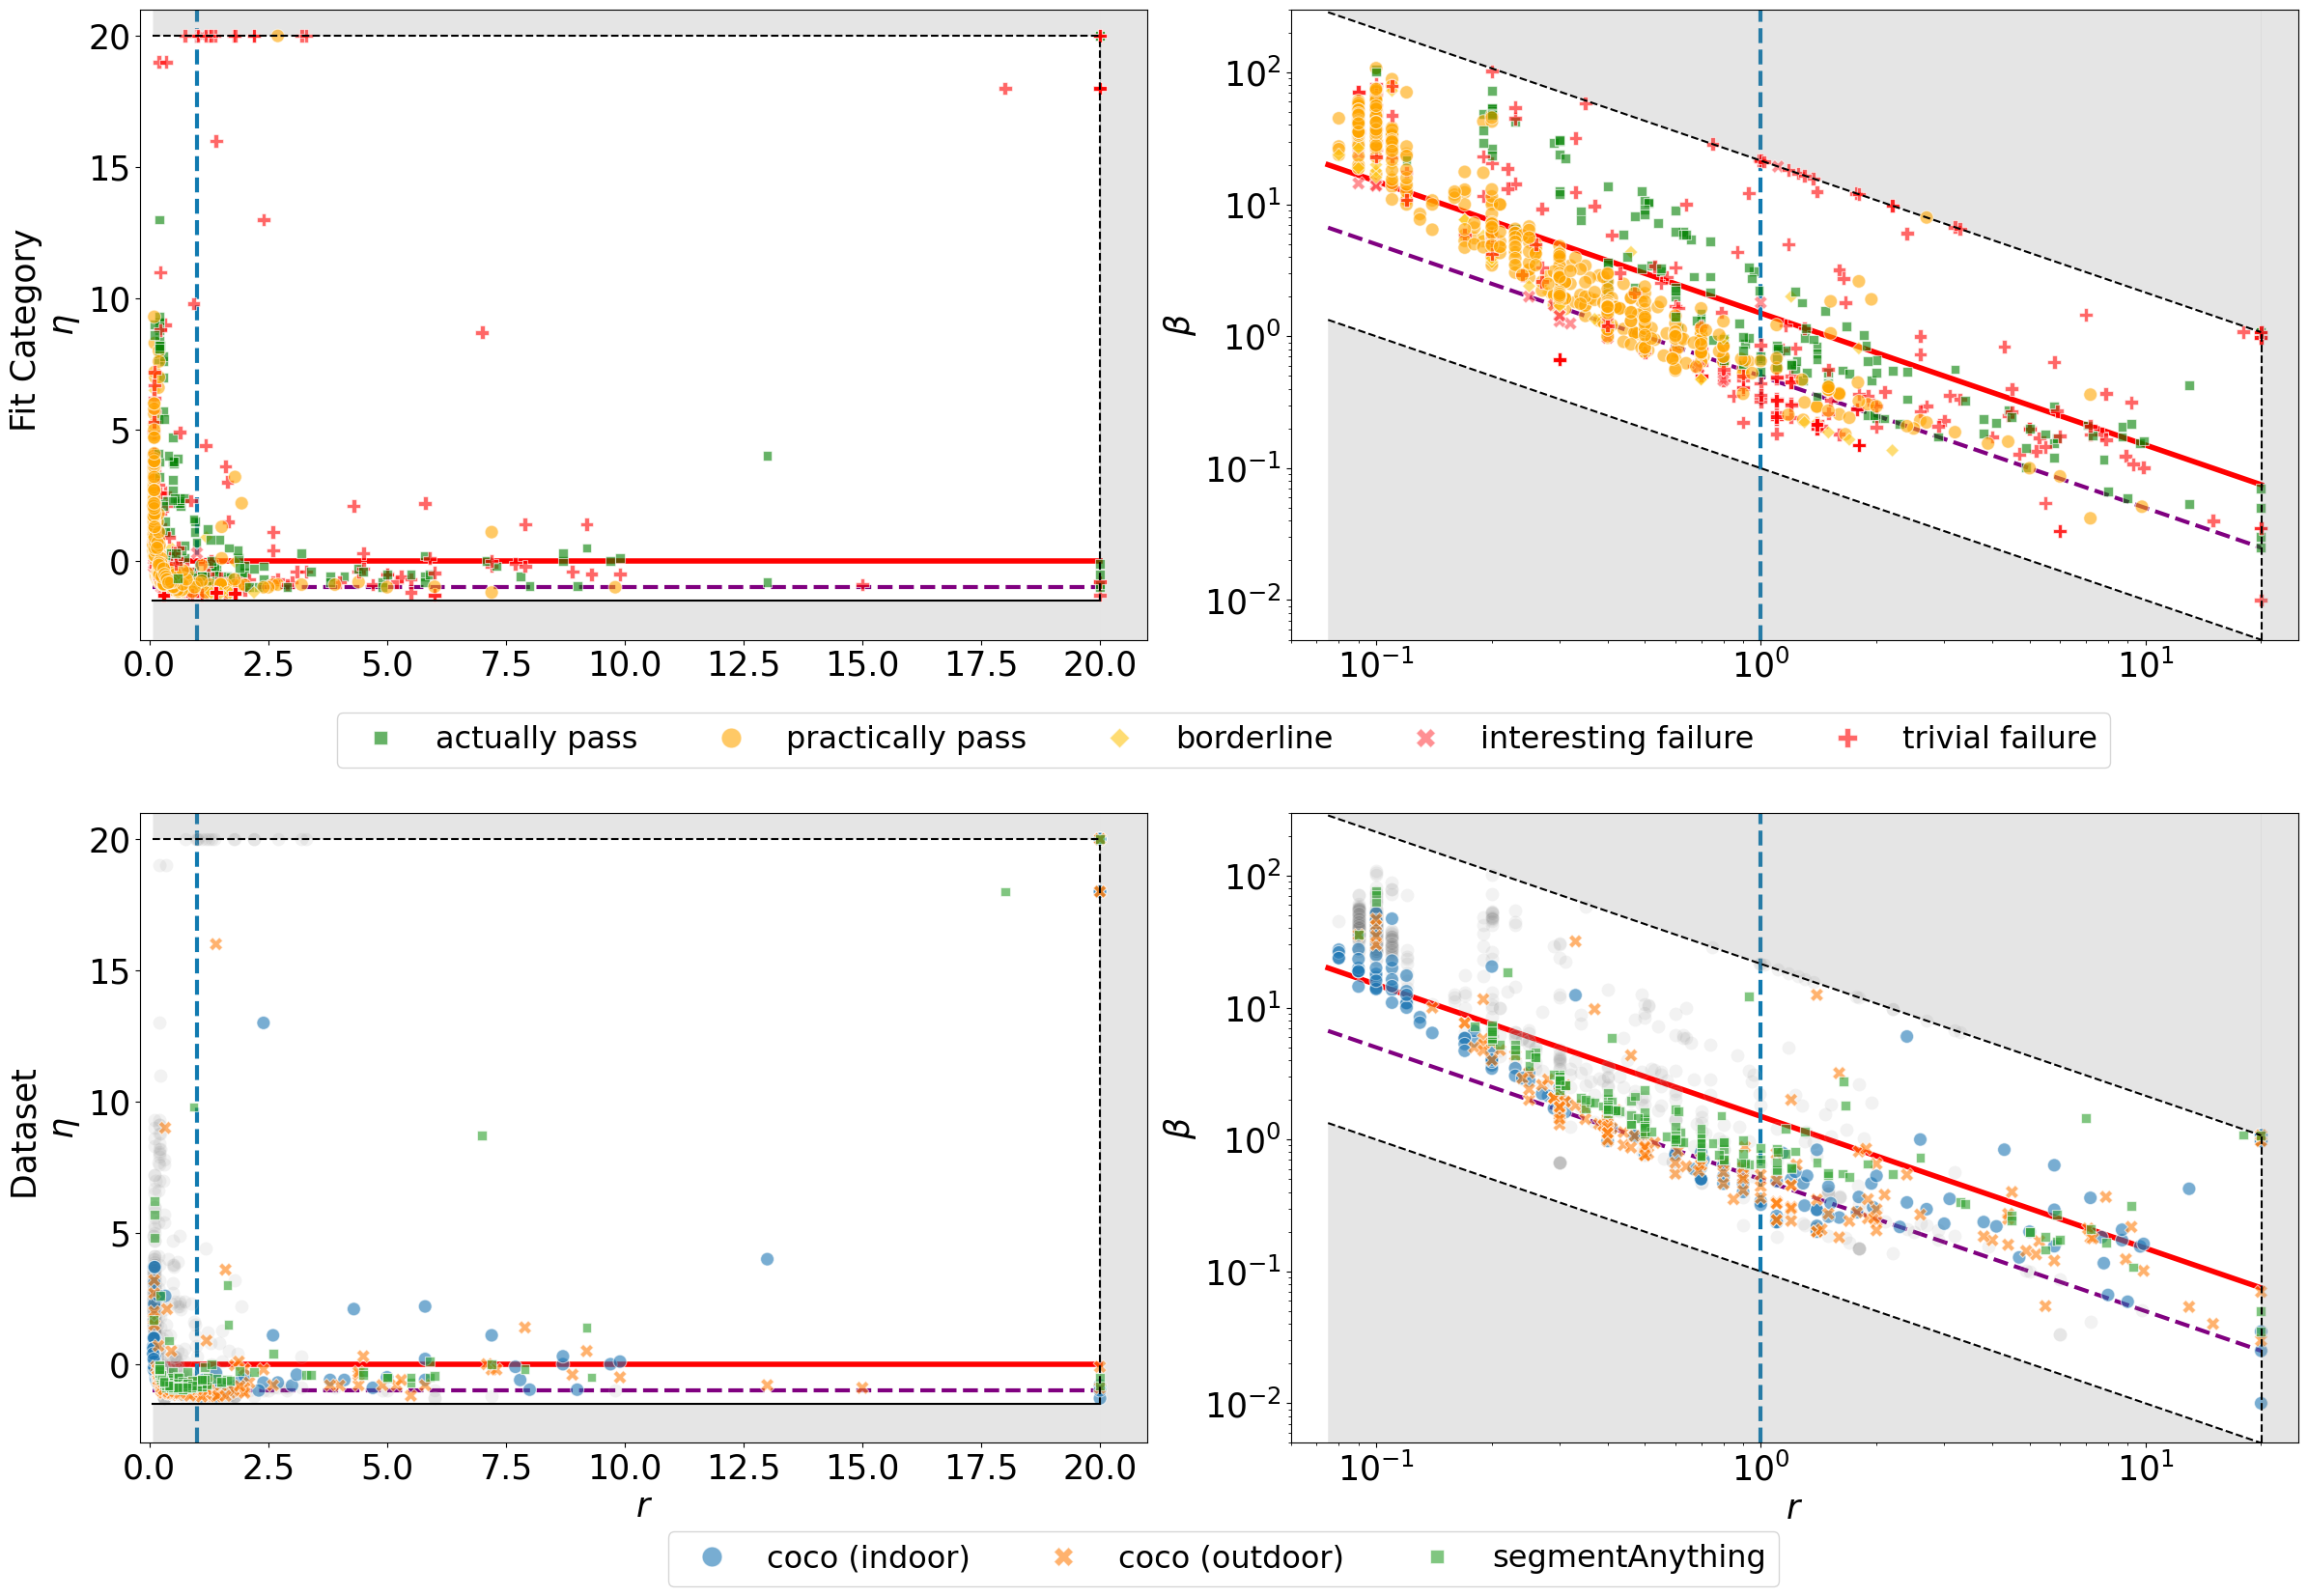

In [6]:
temp = main_df.copy()
category_1 = 'failure_category'
category_2 = 'dataset'
dataset_type = 'natural'
temp['dataset'] = temp['dataset'].apply(lambda x : x if x in list(temp[temp['dataset_type'] == dataset_type]['dataset'].unique()) else 'other')

fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# First row, first plot: r-eta space with failure categories
axes[0, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[0, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[0, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[0, 0], linestyle='--')
axes[0, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[0, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[0, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[0, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[0, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_1, ax=axes[0, 0], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)

axes[0, 0].set_xlabel(" ", fontsize=fontsize)
axes[0, 0].set_ylabel("Fit Category \n" + r"$\eta$", fontsize=fontsize)
axes[0, 0].set_ylim(eta_lims)
axes[0, 0].set_xlim((-0.2, 21))
axes[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[0, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# First row, second plot: r-(1/beta) space with failure categories
axes[0, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[0, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[0, 1], linestyle="--")
axes[0, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[0, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[0, 1], linestyle='--', linewidth=3, zorder=0)
axes[0, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_1, ax=axes[0, 1], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[0, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[0, 1].set_xlabel(" \n \n ", fontsize=fontsize)
axes[0, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[0, 1].set_xlim((0.06, 25))
axes[0, 1].set_ylim((0.005, 300))
axes[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

handles_fit, labels_fit = axes[0, 0].get_legend_handles_labels()
labels_fit = [l.replace("_", " ") for l in labels_fit]

desired_order_fit = ['actually pass', 'practically pass', 'borderline', 'interesting failure', 'trivial failure']
label_handle_map_fit = dict(zip(labels_fit, handles_fit))

labels_fit = [label for label in desired_order_fit if label in label_handle_map_fit]
handles_fit = [label_handle_map_fit[label] for label in labels_fit]

fig.legend(
    handles_fit, 
    labels_fit, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, 0.49), 
    ncol=5
)

axes[0, 1].legend().set_visible(False)
axes[0, 0].legend().set_visible(False)

# Second row, first plot: r-eta space with dataset_types

axes[1, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[1, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[1, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[1, 0], linestyle='--')
axes[1, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[1, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[1, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[1, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[1, 0], linestyle="--")
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_eta', ax=axes[1, 0], alpha=0.1, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_eta', hue=category_2, ax=axes[1, 0], alpha=0.6, s=100, style=category_2)

axes[1, 0].set_xlabel(r"$r$", fontsize=25)
axes[1, 0].set_ylabel(f"{category_2.capitalize()} \n" + r"$\eta$", fontsize=fontsize)
axes[1, 0].set_ylim(eta_lims)
axes[1, 0].set_xlim((-0.2, 21))
axes[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[1, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# Second row, second plot: r-(1/beta) space with failure categories
axes[1, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[1, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[1, 1], linestyle="--")
axes[1, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[1, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[1, 1], linestyle='--', linewidth=3, zorder=0)
axes[1, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_beta', ax=axes[1, 1], alpha=0.1, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_beta', hue=category_2, ax=axes[1, 1], alpha=0.6, s=100, style=category_2)

axes[1, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[1, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[1, 1].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[1, 1].set_xlim((0.06, 25))
axes[1, 1].set_ylim((0.005, 300))
axes[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_yscale('log')
# Create a shared legend for both plots on the second row
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, -0.04), 
    ncol=5
)
axes[1, 1].legend().set_visible(False)
axes[1, 0].legend().set_visible(False)

plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"fit_category_{dataset_type}_point_plot.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')

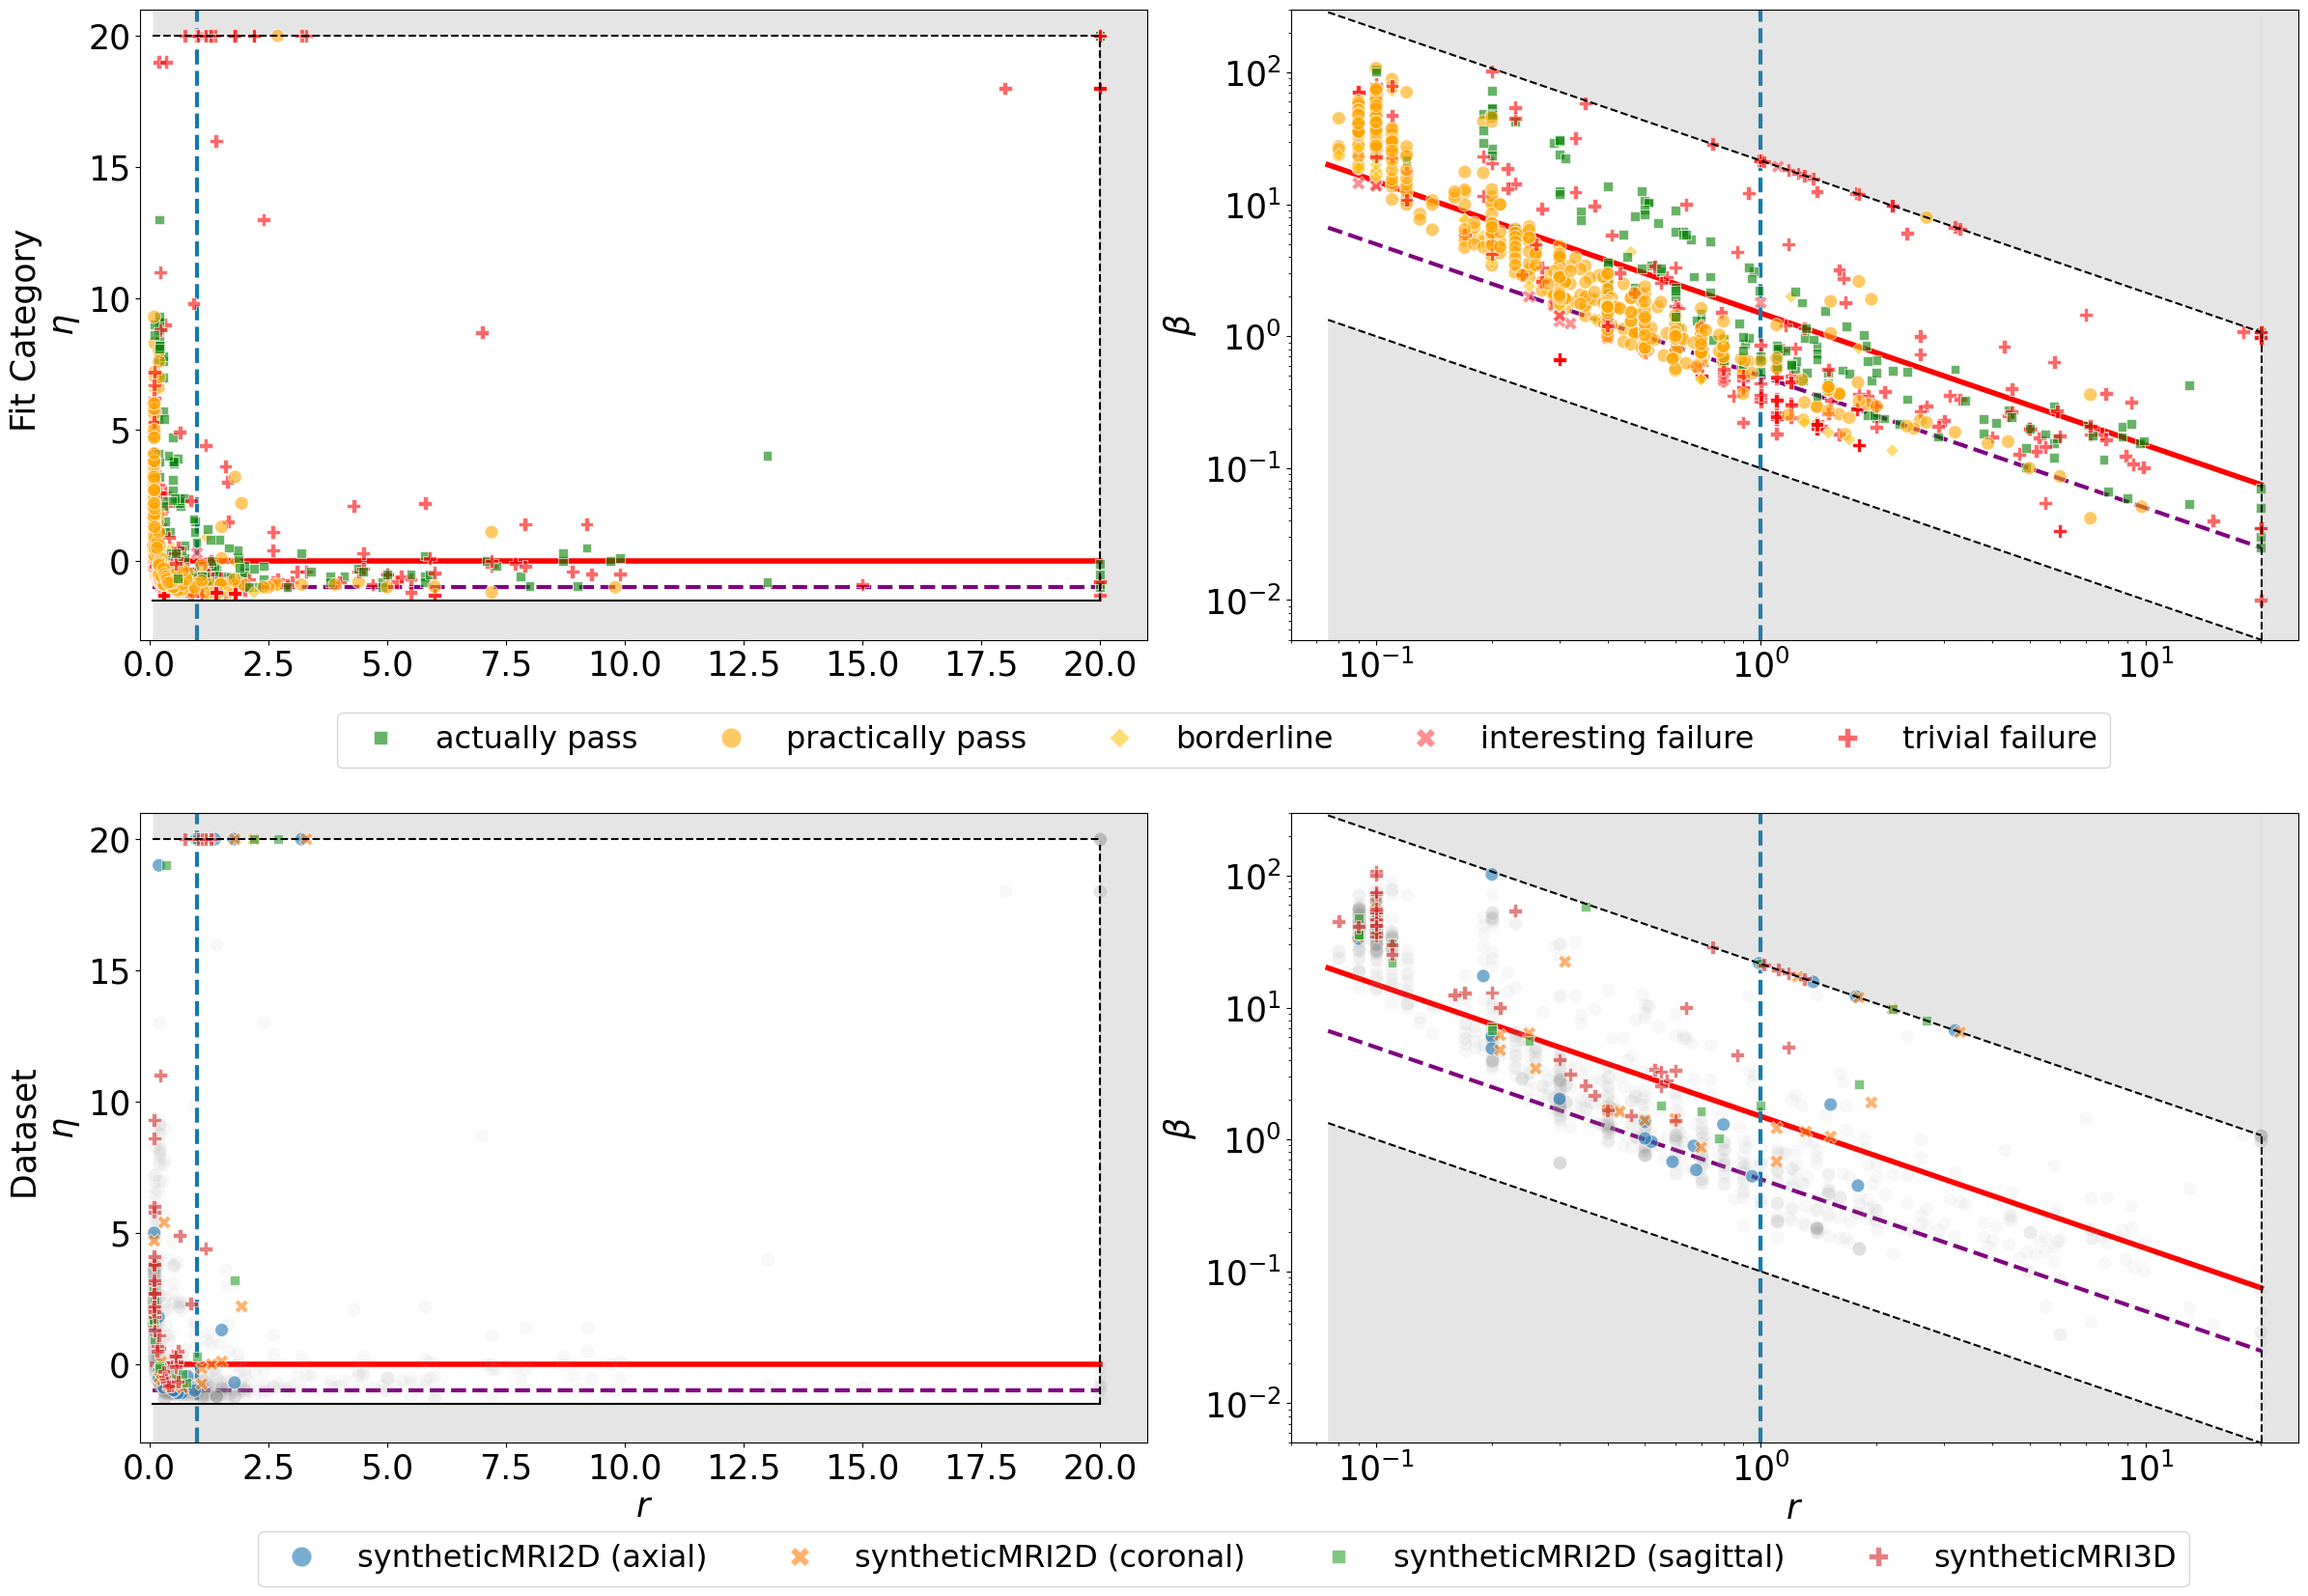

In [7]:
temp = main_df.copy()
category_1 = 'failure_category'
category_2 = 'dataset'
dataset_type = 'medical'

temp['dataset'] = temp['dataset'].apply(lambda x : x if x in list(temp[temp['dataset_type'] == dataset_type]['dataset'].unique()) else 'other')


fig, axes = plt.subplots(2, 2, figsize=(24, 16))

# First row, first plot: r-eta space with failure categories
axes[0, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[0, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[0, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[0, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[0, 0], linestyle='--')
axes[0, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[0, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[0, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[0, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[0, 0], linestyle="--")
sns.scatterplot(data=temp, x='best_r', y='best_eta', hue=category_1, ax=axes[0, 0], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)

axes[0, 0].set_xlabel(" ", fontsize=fontsize)
axes[0, 0].set_ylabel("Fit Category \n" + r"$\eta$", fontsize=fontsize)
axes[0, 0].set_ylim(eta_lims)
axes[0, 0].set_xlim((-0.2, 21))
axes[0, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[0, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# First row, second plot: r-(1/beta) space with failure categories
axes[0, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[0, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[0, 1], linestyle="--")
axes[0, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[0, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[0, 1], linestyle='--', linewidth=3, zorder=0)
axes[0, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp, x='best_r', y='best_beta', hue=category_1, ax=axes[0, 1], alpha=0.6, s=100, palette=fit_cat_palette, style=category_1)
axes[0, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[0, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[0, 1].set_xlabel(" \n \n ", fontsize=fontsize)
axes[0, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[0, 1].set_xlim((0.06, 25))
axes[0, 1].set_ylim((0.005, 300))
axes[0, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[0, 1].set_xscale('log')
    axes[0, 1].set_yscale('log')

handles_fit, labels_fit = axes[0, 0].get_legend_handles_labels()
labels_fit = [l.replace("_", " ") for l in labels_fit]

desired_order_fit = ['actually pass', 'practically pass', 'borderline', 'interesting failure', 'trivial failure']
label_handle_map_fit = dict(zip(labels_fit, handles_fit))

labels_fit = [label for label in desired_order_fit if label in label_handle_map_fit]
handles_fit = [label_handle_map_fit[label] for label in labels_fit]

fig.legend(
    handles_fit, 
    labels_fit, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, 0.49), 
    ncol=5
)

axes[0, 1].legend().set_visible(False)
axes[0, 0].legend().set_visible(False)

# Second row, first plot: r-eta space with dataset_types

axes[1, 0].fill_between(r_vals, y1=eta_lims[0], y2=eta_valid[0], color='gray', alpha=0.2, ec=None)
axes[1, 0].fill_between(r_vals, y1=eta_valid[1], y2=21, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=0, color='red', ax=axes[1, 0], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=-1, color='purple', ax=axes[1, 0], linestyle='--', linewidth=3, zorder=0)
sns.lineplot(x=[20, 20], y=[-1.5, 20], color='black', ax=axes[1, 0], linestyle='--')
axes[1, 0].axvline(x=20, ymin=0.06, ymax=0.95, color='black', linestyle='dashed')
axes[1, 0].fill_betweenx(y=eta_lims, x1=20, x2=25, color='gray', alpha=0.2, ec=None)

axes[1, 0].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', alpha=1, linewidth=3, zorder=0)
sns.lineplot(x=r_vals, y=eta_valid[0], color='black', ax=axes[1, 0])
sns.lineplot(x=r_vals, y=eta_valid[1], color='black', ax=axes[1, 0], linestyle="--")
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_eta', ax=axes[1, 0], alpha=0.05, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_eta', hue=category_2, ax=axes[1, 0], alpha=0.6, s=100, style=category_2)

axes[1, 0].set_xlabel(r"$r$", fontsize=25)
axes[1, 0].set_ylabel(f"{category_2.capitalize()} \n" + r"$\eta$", fontsize=fontsize)
axes[1, 0].set_ylim(eta_lims)
axes[1, 0].set_xlim((-0.2, 21))
axes[1, 0].tick_params(axis='both', which='major', labelsize=fontsize)
axes[1, 0].legend(markerscale=1.5, fontsize=10, loc='center right').set_visible(False)

# Second row, second plot: r-(1/beta) space with failure categories
axes[1, 1].fill_between(r_vals, ylims[0], beta_vals_below, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=beta_vals_above, color='black', ax=axes[1, 1], linestyle="--")
sns.lineplot(x=r_vals, y=beta_vals_below, color='black', ax=axes[1, 1], linestyle="--")
axes[1, 1].fill_between(r_vals, y1=beta_vals_above, y2=beta_vals_above[0]+100, color='gray', alpha=0.2, ec=None)
sns.lineplot(x=r_vals, y=1.5 / r_vals, color='red', ax=axes[1, 1], linewidth=4, zorder=0)
sns.lineplot(x=r_vals, y=(1.5 - 1) / r_vals, color='purple', ax=axes[1, 1], linestyle='--', linewidth=3, zorder=0)
axes[1, 1].axvline(x=1, color='xkcd:nice blue', linestyle='dashed', linewidth=3, alpha=1, zorder=0)
sns.scatterplot(data=temp[temp['dataset_type'] != dataset_type], x='best_r', y='best_beta', ax=axes[1, 1], alpha=0.05, s=100, color='gray')
sns.scatterplot(data=temp[temp['dataset_type'] == dataset_type], x='best_r', y='best_beta', hue=category_2, ax=axes[1, 1], alpha=0.6, s=100, style=category_2)

axes[1, 1].axvline(x=20.1, ymax=0.49, color='black', linestyle='dashed')
axes[1, 1].fill_betweenx(y=[-1.4, 300], x1=20, x2=300, color='gray', alpha=0.2, ec=None)

axes[1, 1].set_xlabel(r"$r$", fontsize=fontsize)
axes[1, 1].set_ylabel(r'$\beta$', fontsize=fontsize)
axes[1, 1].set_xlim((0.06, 25))
axes[1, 1].set_ylim((0.005, 300))
axes[1, 1].tick_params(axis='both', which='major', labelsize=fontsize)
if log_scale:
    axes[1, 1].set_xscale('log')
    axes[1, 1].set_yscale('log')
# Create a shared legend for both plots on the second row
handles, labels = axes[1, 1].get_legend_handles_labels()
fig.legend(
    handles, 
    labels, 
    markerscale=1.5, 
    fontsize=fontsize-2, 
    loc='lower center', 
    bbox_to_anchor=(0.53, -0.04), 
    ncol=5
)
axes[1, 1].legend().set_visible(False)
axes[1, 0].legend().set_visible(False)

plt.subplots_adjust(hspace=0.9)
plt.tight_layout()
plt.show()

if SAVE_FIGS:
    save_path = os.path.join(plots_path, f"fit_category_{dataset_type}_point_plot.jpg")
    fig.savefig(save_path, dpi=DPI, bbox_inches='tight')
